# Heat Transfer Problem

A wall 0.12 m thick has a thermal diffusivity of 1.5*10^(-6) m^2/s and is initially at a uniform temperature of 85 deg C. Suddenly, one face is lowered to a temperature of 20 deg C, while the other face is perfectly insulated. Using an explicit finite deference technique with time increments of 300s, find the temperature distribution at t = 45 minutes througout the wall.


Assume:
- Unsteady
- 1D
- Constant properties
- Neg. Radiation


### Input:
- alpha: thermal diffusivity (m^2/s)
- T_i: initial temperature (°C)
- dt: time step (s)
- T_0: boundary temperature (°C)
- F_0: Fourier number (dimensionless)
- thickness: length of the rod (m)
- t_final: final time (s)

In [2]:
import numpy as np
import math
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# Input parameters
alpha = 1.5e-6 # m^2/s
T_i = 85 # degC
dt = 300 # s
T_0 = 20 # degC
F_0 = 0.5
thickness = 0.12 # m
t_final = 45 * 60 # s


### Create our equations

In [3]:
dx = np.sqrt(alpha*dt/F_0)
t = np.arange(0,t_final+1,dt)

no_internal_nodes = int(thickness/dx)
no_phantom_nodes = math.ceil((len(t) - no_internal_nodes)/2)
total_nodes = 1+no_internal_nodes+no_phantom_nodes

- Initialize imposed temperature T_0 and initial uniform temp distribution
- For each column starting at T_1 to end: average the previous temperature of the adjacent nodes.

In [4]:
Temp = np.zeros((len(t),total_nodes))

# Imposed temperature T_0
Temp[:,0] = T_0

# Initialize temperatures of upper triangle
for i in range(len(t)):
    for j in range(i,total_nodes-1):
        Temp[i,j+1]=T_i

# Calculates averages temperatures of lower triangle
for i in range(1,len(t)):
    for j in range(1,total_nodes-1):
        Temp[i,j]=round((Temp[i-1,j-1]+Temp[i-1,j+1])/2, 3)

# Remove phantom nodes
Temp = np.delete(Temp, np.s_[-no_phantom_nodes:], axis=1)
print(Temp)

[[20.    85.    85.    85.    85.   ]
 [20.    52.5   85.    85.    85.   ]
 [20.    52.5   68.75  85.    85.   ]
 [20.    44.375 68.75  76.875 85.   ]
 [20.    44.375 60.625 76.875 80.938]
 [20.    40.312 60.625 70.782 80.938]
 [20.    40.312 55.547 70.782 76.875]
 [20.    37.774 55.547 66.211 76.875]
 [20.    37.774 51.992 66.211 73.32 ]
 [20.    35.996 51.992 62.656 73.32 ]]


### Visualization

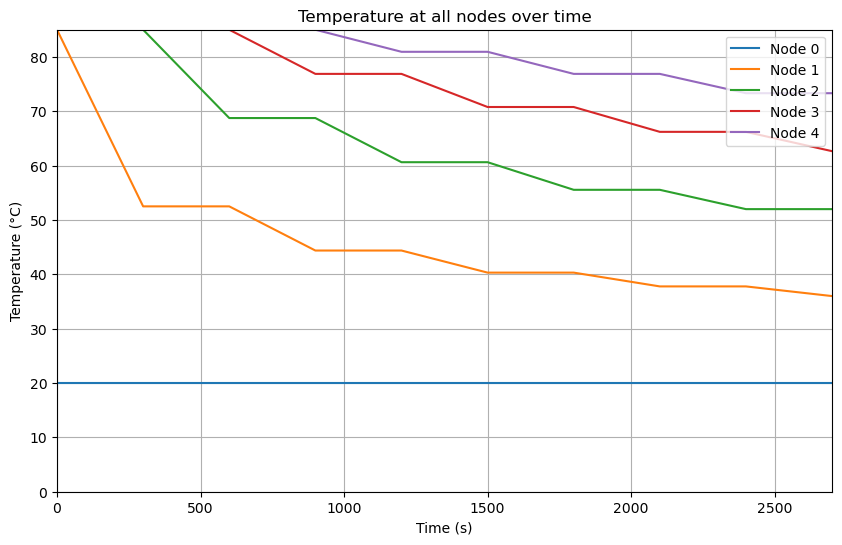

In [5]:
# Plotting time vs temperature at all nodes
plt.figure(figsize=(10, 6))
plt.title('Temperature at all nodes over time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.xlim(0, t_final)
plt.ylim(0, T_i)
plt.grid()
for j in range(Temp.shape[1]):
    plt.plot(t, Temp[:, j], label=f'Node {j}')
plt.legend(loc='upper right')
plt.show()

In [6]:
# Animations in Jupyter Notebook
%matplotlib notebook

# Animation
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Temperature distribution over time')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Temperature (°C)')
ax.set_xlim(0, thickness)
ax.set_ylim(0, T_i)
ax.grid()

line, = ax.plot([], [], label='Time = 0 s')
legend = ax.legend(loc='upper right')

def init():
    line.set_data([], [])
    return line,

def update(frame):
    time = frame * dt
    line.set_data(np.linspace(0, thickness, Temp.shape[1]), Temp[frame])
    line.set_label(f'Time = {time} s')
    legend = ax.legend(loc='upper right')
    return line, legend

ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=100)

plt.show()

<IPython.core.display.Javascript object>